In [1]:
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing import image
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from skimage import transform
# Keras API
from keras.models import Model
import tensorflow as tf
tf.keras.layers.Conv2D
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import SVG
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

train_dir ="/content/drive/My Drive/Colab Notebooks/Dataset/Train"
test_dir="/content/drive/My Drive/Colab Notebooks/Dataset/Valid"

In [2]:
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing import image
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from skimage import transform
# Keras API
from keras.models import Model
import tensorflow as tf
tf.keras.layers.Conv2D
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import SVG
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [3]:
train_dir ="C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Train/"
test_dir="C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/"

# Data Read

In [4]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [5]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) 
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

17 Classes
31465 Train images
7851 Test images


# Data Preprocessing

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, 
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


# Setting Height and Width of the Images

In [1]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =125

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

NameError: name 'train_datagen' is not defined

# Print Name Of The Classes

In [2]:
train_generator.class_indices

NameError: name 'train_generator' is not defined

# CNN Parameter Building

In [9]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [10]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


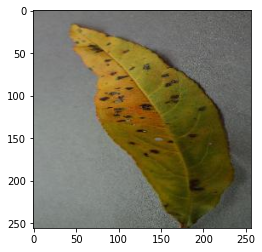

In [11]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Train/Peach_Disease_Bacerial/8d251b39-0648-433a-93a1-809aa0871f12___Rutg._Bact.S 1890.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Train/Peach_Disease_Bacerial/8d251b39-0648-433a-93a1-809aa0871f12___Rutg._Bact.S 1890.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

# Visualizing Output After Every Layer

In [12]:
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

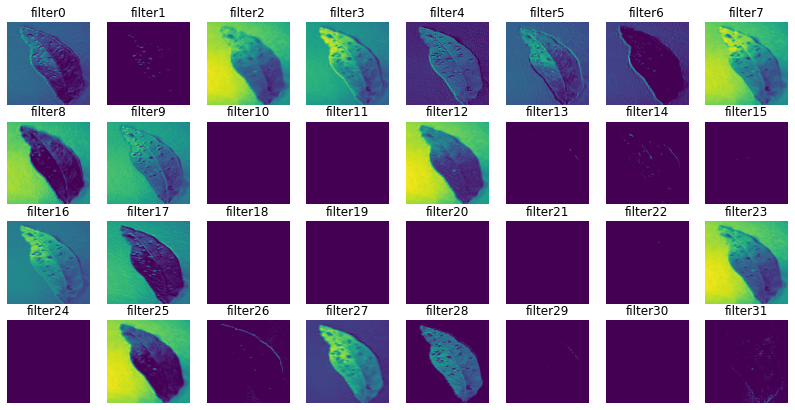

In [13]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

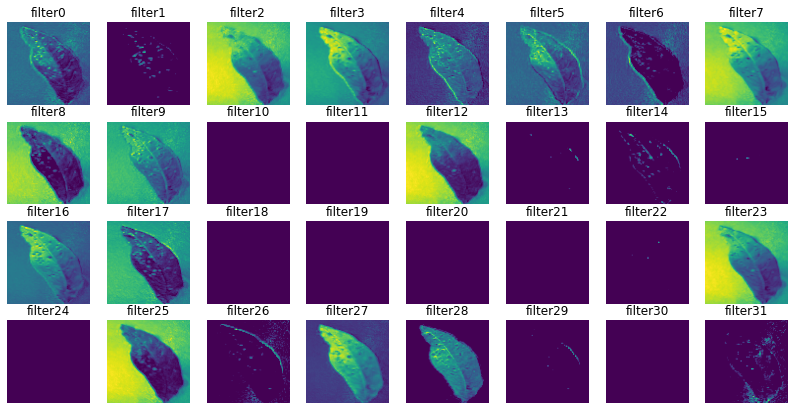

In [14]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

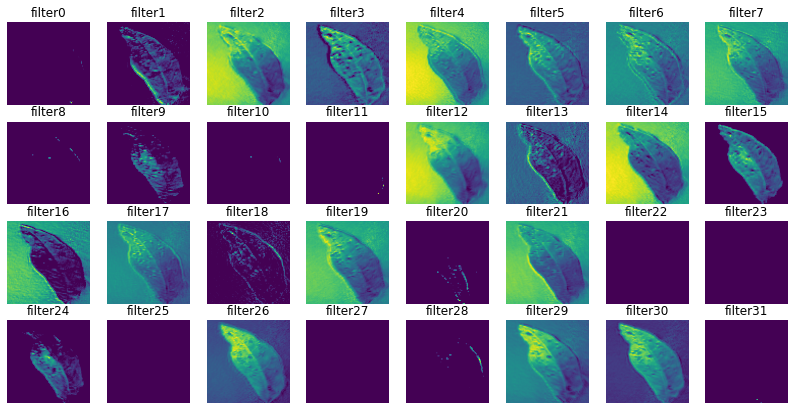

In [15]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

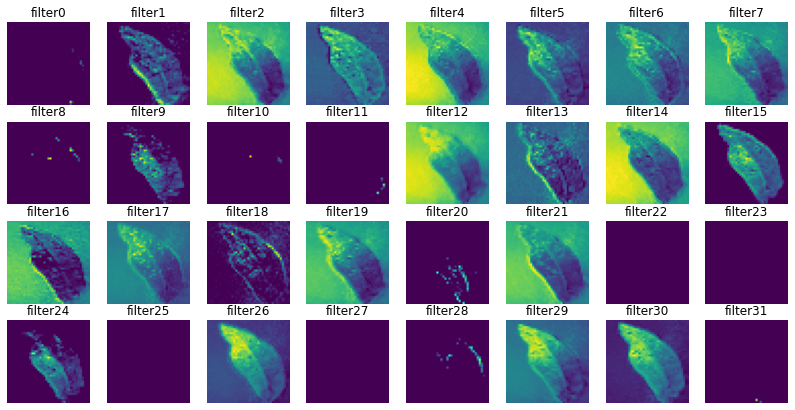

In [16]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

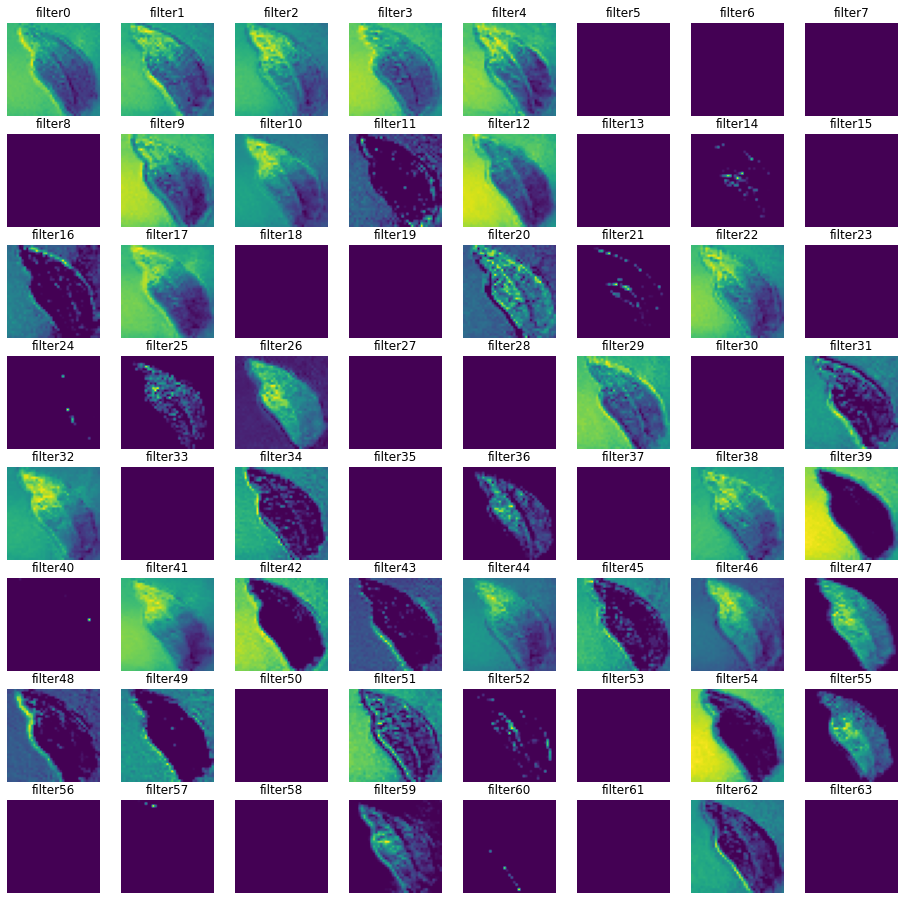

In [17]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

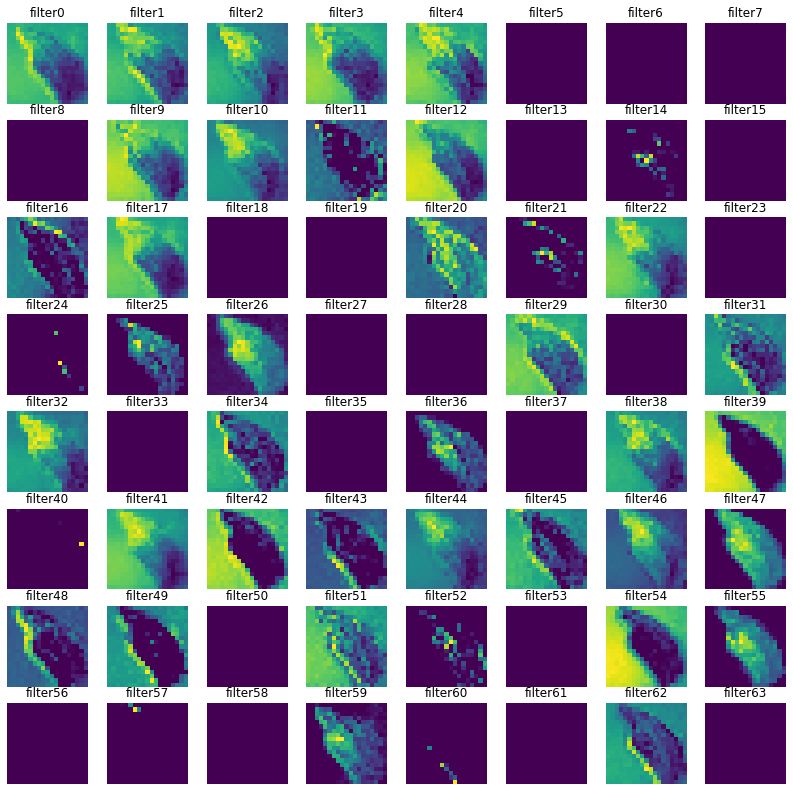

In [18]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

# Training The Model

In [19]:
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 31465 images belonging to 17 classes.


In [20]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=17,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,
                          verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/17
251/251 [==============================] - 3708s 15s/step - loss: 1.0716 - accuracy: 0.6514 - val_loss: 0.5875 - val_accuracy: 0.8033
Epoch 2/17
251/251 [==============================] - 3040s 12s/step - loss: 0.4327 - accuracy: 0.8541 - val_loss: 0.2576 - val_accuracy: 0.9120
Epoch 3/17
251/251 [==============================] - 2717s 11s/step - loss: 0.2867 - accuracy: 0.9035 - val_loss: 0.1660 - val_accuracy: 0.9417
Epoch 4/17
251/251 [==============================] - 3732s 15s/step - loss: 0.2247 - accuracy: 0.9235 - val_loss: 0.1581 - val_accuracy: 0.9465
Epoch 5/17
251/251 [==============================] - 2109s 8s/step - loss: 0.1751 - accuracy: 0.9410 - val_loss: 0.1332 - val_accuracy: 0.9533
Epoch 6/17
251/251 [==============================] - 1920s 8s/step - loss: 0.1483 - accuracy: 0.9497 - val_loss: 0.1053 - val_accuracy: 0.9644
Epoch 7/17
251/251 [==============================] - 94

In [21]:
train.history

{'loss': [1.0716259479522705,
  0.43272385001182556,
  0.28667354583740234,
  0.22474908828735352,
  0.1751147210597992,
  0.14831751585006714,
  0.12512820959091187,
  0.12484200298786163,
  0.09945765137672424,
  0.10335399955511093,
  0.09618523716926575,
  0.0826675295829773,
  0.07694999128580093,
  0.07585678994655609,
  0.08289609849452972,
  0.07353133708238602,
  0.06202401593327522],
 'accuracy': [0.6514358520507812,
  0.8540842533111572,
  0.9035418033599854,
  0.9234524369239807,
  0.9410338401794434,
  0.9497128129005432,
  0.9559668302536011,
  0.9572750329971313,
  0.9673579931259155,
  0.9640395641326904,
  0.9679004549980164,
  0.9707083702087402,
  0.9731014966964722,
  0.9744096994400024,
  0.97141033411026,
  0.9754307866096497,
  0.9785577654838562],
 'val_loss': [0.5874632596969604,
  0.25763705372810364,
  0.16598251461982727,
  0.15809908509254456,
  0.13318555057048798,
  0.1053326278924942,
  0.0967678427696228,
  0.060618799179792404,
  0.08049876242876053,
 

# Accuracy Graph

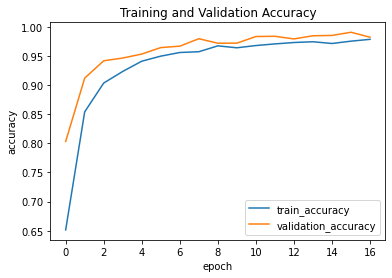

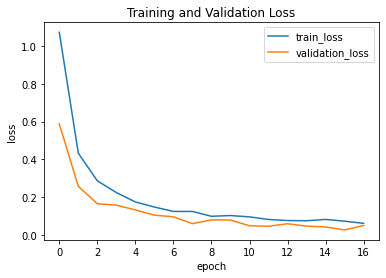

In [22]:
def plot_accuracy(train,title):
    plt.title(title)
    plt.plot(train.history['accuracy']) 
    plt.plot(train.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
    
def plot_loss(train,title):
    plt.title(title)
    plt.plot(train.history['loss'])
    plt.plot(train.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

    
plot_accuracy(train,'Training and Validation Accuracy')
plot_loss(train,'Training and Validation Loss')

# Model Summary

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

# Saving the model

In [24]:
from tensorflow.keras.models import load_model
model.save('Model__Roy.h5')

In [45]:
import pickle
with open("model_pickel","wb") as f:
    pickle.dump(model,f)


TypeError: cannot pickle '_thread.RLock' object

# Confusion Matrix

In [25]:
validation_generator.reset()

predictions = model.predict_generator(generator = validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes

Instructions for updating:
Please use Model.predict, which supports generators.


In [26]:
import pandas as pd

labels_map = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels_map.items())
predict = [labels[k] for k in y_pred]

filenames = validation_generator.filenames
results = pd.DataFrame({"Filename":filenames,"Predictions":predict})

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y,predict_y):
    c = confusion_matrix(test_y, predict_y)
    
    print("Number of misclassified images: ", (len(test_y)-np.trace(c)))
    print("Percentage of misclassified images: ", (len(test_y)-np.trace(c))*100/len(test_y))
    
    cmap = sns.light_palette("red")
    plt.figure(figsize=(25,12))
    sns.heatmap(c, annot = True, cmap=cmap, fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [ ]:
import seaborn as sns
plot_confusion_matrix(y_test, y_pred) 

# Predict From The Model

In [29]:
def predict_image(file):
    np_image = Image.open(file)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (256, 256, 3))
    image = np.expand_dims(np_image, axis = 0)
    pred= model.predict(image)
    k = np.argmax(pred,axis=1)
    clas=labels[k[0]]
    plt.imshow(plt.imread(file))
    plt.title("predicted:" +str(clas))
    plt.show()

In [30]:
from skimage import transform
from PIL import Image

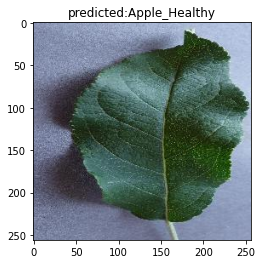

In [31]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Apple_Healthy/0c83f4eb-4949-47c8-bf63-312d16e64913___RS_HL 7619.JPG")

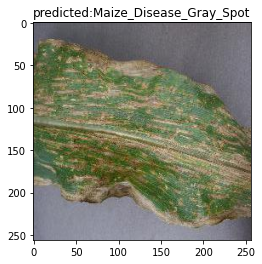

In [32]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Maize_Disease_Gray_Spot/00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp 4655_90deg.JPG")

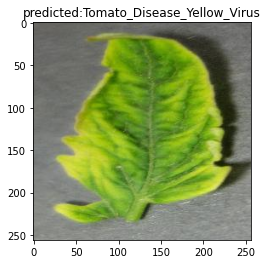

In [33]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Tomato_Disease_Yellow_Virus/11565eea-c48c-4727-b880-7c9a76fb3e35___UF.GRC_YLCV_Lab 01799.JPG")

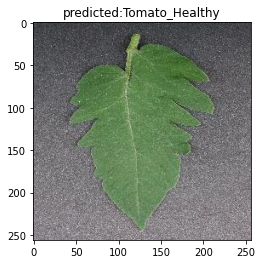

In [34]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Tomato_Healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1_180deg.JPG")

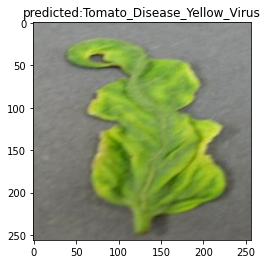

In [35]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Tomato_Disease_Yellow_Virus/37338a4a-c04f-4cc7-bc36-d3deb78c95a9___UF.GRC_YLCV_Lab 03336.JPG")

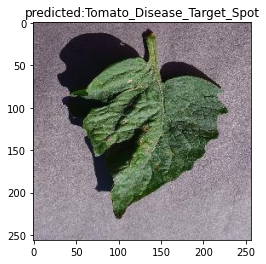

In [36]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Tomato_Disease_Target_Spot/0a458dfc-b513-44f2-a3ce-dab4c3adb939___Com.G_TgS_FL 8166_flipTB.JPG")

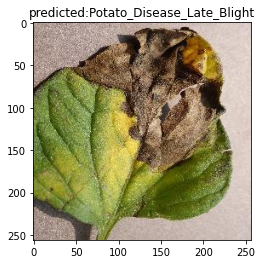

In [37]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Tomato_Disease_Blight/0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985_flipLR.JPG")

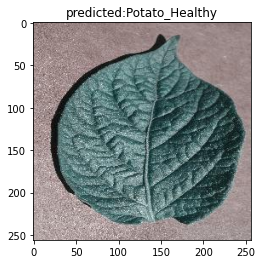

In [38]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Potato_Healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864_newGGR.JPG")

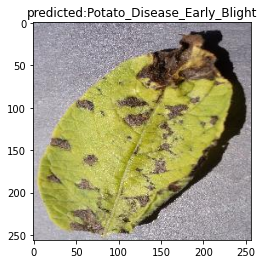

In [39]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Potato_Disease_Early_Blight/0d2e2971-f1c9-4278-b35c-91dd8a22a64d___RS_Early.B 7581.JPG")

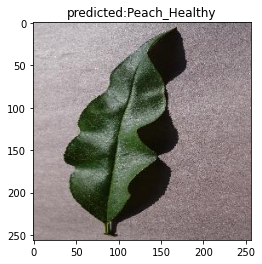

In [40]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Peach_Healthy/0ad0e70a-fa1a-4ec4-885e-2bbb3b57ab93___Rutg._HL 3672.JPG")

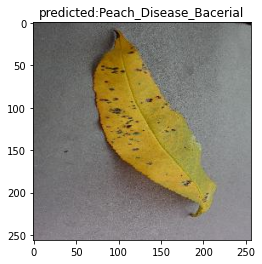

In [41]:
predict_image("C:/Users/Ganpati Kumar Roy/FarmKet-Work/Leaf Disease Detection/Leaf Data-Set/Valid/Peach_Disease_Bacerial/0a71ba91-8bde-4a91-84a9-bf950488f718___Rutg._Bact.S 2121.JPG")